In [0]:
# from google.colab import files
# uploaded = files.upload()

**Read data file**

In [0]:
#read Data 
import pandas as pd
import numpy as np
df=pd.read_csv("apr.csv", header = 0)

**Remove Duplicates  rows**

In [3]:
#Remove Duplicates  rows
# print(len(df))
print("No of rows before removing duplicate rows",len(df))
df.drop_duplicates( subset=None, keep='first', inplace=True)
print("No of rows after removing duplicate rows",len(df))

No of rows before removing duplicate rows 5043
No of rows after removing duplicate rows 4998


**Find if any row have all null values** 

In [0]:
row_count, column_count = df.shape
list_of_columns=list(df.columns)
# print(row_count, column_count,list_of_columns[len(list_of_columns)-1])

In [0]:
kf = df.dropna(how = 'all')
# print(df.shape," ",kf.shape)

 **#Result of analysis** here we can see that we do not have any row where all columns values are null

**Find Percentage of null value in each column** 

In [6]:
#analysis2
#find percentage of null values 
df_missing=df.isna()
df_count_missing=df_missing.sum()
per_none_value=df_count_missing/len(df_count_missing)
per_none_value.sort_values(ascending=False,inplace=True)
print("% of null values in each column")
print(per_none_value)

% of null values in each column
gross                        31.214286
budget                       17.392857
aspect_ratio                 11.678571
content_rating               10.750000
plot_keywords                 5.428571
title_year                    3.821429
director_name                 3.678571
director_facebook_likes       3.678571
num_critic_for_reviews        1.750000
actor_3_name                  0.821429
actor_3_facebook_likes        0.821429
num_user_for_reviews          0.750000
color                         0.678571
duration                      0.535714
facenumber_in_poster          0.464286
actor_2_name                  0.464286
actor_2_facebook_likes        0.464286
language                      0.428571
actor_1_name                  0.250000
actor_1_facebook_likes        0.250000
country                       0.178571
movie_facebook_likes          0.000000
genres                        0.000000
movie_title                   0.000000
num_voted_users               0.

**Gross** is "Gross earnings of the movie in Dollars"

**budget** is "Budget of the movie in Dollars"

**aspect_ratio** is "Aspect ratio the movie was made in"

**content_rating** is "Content rating of the movie"





**Now We are droping the rows where the values of "gross" or "budget" "aspect_ratio" r "content_rating" is null in respective column**

In [0]:
tf1=df.drop(df[df['gross'].isna()].index, inplace = False)
tf1=tf1.drop(tf1[tf1['budget'].isna()].index, inplace = False)

In [0]:
# df['imdb_score']
# tf1.shape[0]
# (df.shape[0]-tf1.shape[0])/df.shape[0]
#here we have deleted around 22 % of data

In [9]:
tf1=tf1.drop(tf1[tf1['aspect_ratio'].isna()].index, inplace = False)
tf1=tf1.drop(tf1[tf1['content_rating'].isna()].index, inplace = False)

tis=((df.shape[0]-tf1.shape[0])/df.shape[0])*100
print("% of data rows removed on deleting rows null values in `goss`,`budget`,`aspect_ratio`,`content_rating` is "+str(tis))
#only around 24% so now we have deleted all rows 

% of data rows removed on deleting rows null values in `goss`,`budget`,`aspect_ratio`,`content_rating` is 24.9499799919968


['color',
 'director_name',
 '**num_critic_for_reviews**',
 '**duration**',
 '**director_facebook_likes**',
 '**actor_3_facebook_likes**',
 'actor_2_name',
 '**actor_1_facebook_likes**',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 '**num_voted_users**',
 '**cast_total_facebook_likes**',
 'actor_3_name',
 '**facenumber_in_poster**',
 'plot_keywords',
 'movie_imdb_link',
 '**num_user_for_reviews**',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 '**actor_2_facebook_likes**',
 'imdb_score',
 'aspect_ratio',
 '**movie_facebook_likes**']

` Here we can see in table data that bold attributes may take value zero so we convert them into NA and than replace NA value of these columns with mean value of that attribute`

**Replace zero with NA**

In [0]:
#Replace zero with NA
tf2=tf1
ls_zero_to_NA='movie_facebook_likes','actor_2_facebook_likes','num_user_for_reviews','facenumber_in_poster','cast_total_facebook_likes','num_voted_users','actor_1_facebook_likes','actor_3_facebook_likes','director_facebook_likes','duration','num_critic_for_reviews'
for k in ls_zero_to_NA:
    tf2[k].replace(0, np.nan, inplace=True)

**Here we are filling NA of columns with mean value**

In [0]:
for colmn in ls_zero_to_NA:
  tf2[colmn]=tf2[colmn].fillna(tf2[colmn].mean())
# tf2

In [0]:
tf2_missing=tf2.isna()
tf2_count_missing=tf2_missing.sum()
tf2_per_none_value=tf2_count_missing/len(tf2_count_missing)
tf2_per_none_value.sort_values(ascending=False,inplace=True)
# tf2_per_none_value
#Now we have NA values in only these columns

**Here only four column are remainng which have NA values we replce them with most frequent values in their column**

In [0]:
tf2 = tf2.fillna(tf2.mode().iloc[0])

# **Make Graphs to Visualise the trends in data**

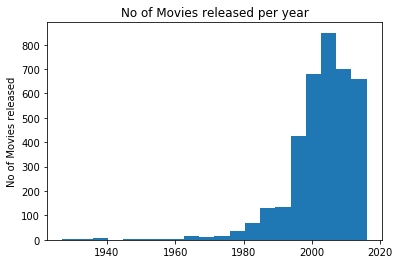

In [14]:
import matplotlib.pyplot as plt
x = tf2['title_year']
plt.hist(x, bins=20)
plt.ylabel('No of Movies released')
plt.title('No of Movies released per year')
plt.show()

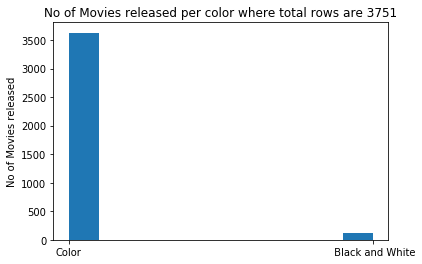

In [15]:
x = tf2['color']
plt.hist(x, bins=10)
plt.ylabel('No of Movies released')
plt.title('No of Movies released per color where total rows are '+str(len(tf2)))
plt.show()

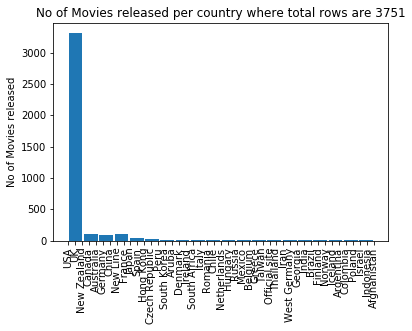

In [16]:
x = tf2['country']
plt.hist(x, bins=20,rwidth=.9)
plt.ylabel('No of Movies released')
plt.title('No of Movies released per country where total rows are '+str(len(tf2)))
plt.xticks(rotation='vertical')
plt.show()

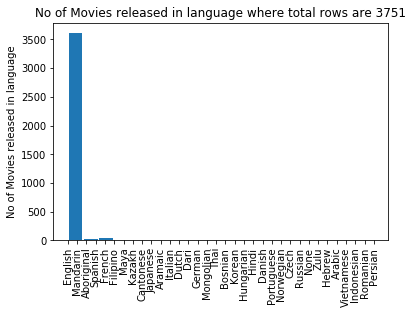

In [17]:
x = tf2['language']
plt.hist(x, bins=20,rwidth=.9)
plt.ylabel('No of Movies released in language')
plt.title('No of Movies released in language where total rows are '+str(len(tf2)))
plt.xticks(rotation='vertical')
plt.show()

**Add profit and profit percentage column for graphs and will drop these columns too before applying algorithems**

In [0]:
tf2['profit'] = tf2.apply(lambda row: row.gross - row.budget, axis = 1)
tf2['profit_percentage'] = tf2.apply(lambda row: (row.profit/row.budget)*100, axis = 1) 
# tf2

In [0]:
group_by_imdb_score = tf2.groupby(by=['imdb_score'])
tf2_avg = group_by_imdb_score.mean()
tf2_count = group_by_imdb_score.count()

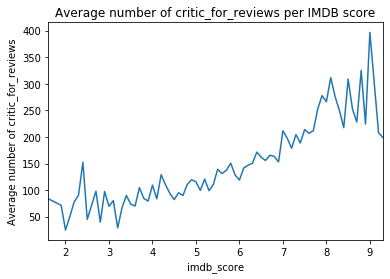

In [20]:
tf2_avg['num_critic_for_reviews'].plot(kind='line')
# df.groupby('state')['name'].nunique().plot(kind='bar')
# plt.hist(x, bins=20,rwidth=.9)
plt.ylabel('Average number of critic_for_reviews')
plt.title('Average number of critic_for_reviews per IMDB score')
# plt.xticks(rotation='vertical')
plt.show()

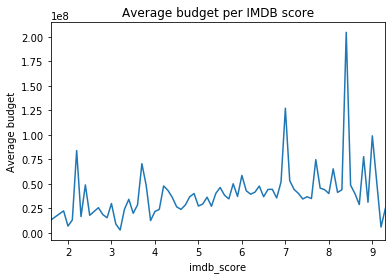

In [21]:
tf2_avg['budget'].plot(kind='line')
# df.groupby('state')['name'].nunique().plot(kind='bar')
# plt.hist(x, bins=20,rwidth=.9)
plt.ylabel('Average budget')
plt.title('Average budget per IMDB score')
# plt.xticks(rotation='vertical')
plt.show()

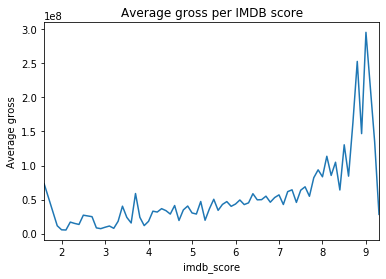

In [22]:
tf2_avg['gross'].plot(kind='line')
# df.groupby('state')['name'].nunique().plot(kind='bar')
# plt.hist(x, bins=20,rwidth=.9)
plt.ylabel('Average gross')
plt.title('Average gross per IMDB score')
# plt.xticks(rotation='vertical')
plt.show()

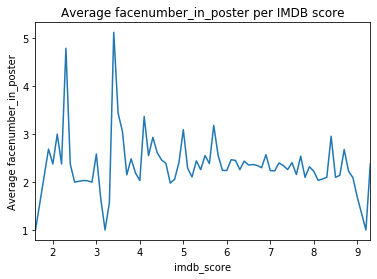

In [23]:
tf2_avg['facenumber_in_poster'].plot(kind='line')
# df.groupby('state')['name'].nunique().plot(kind='bar')
# plt.hist(x, bins=20,rwidth=.9)
plt.ylabel('Average facenumber_in_poster')
plt.title('Average facenumber_in_poster per IMDB score')
# plt.xticks(rotation='vertical')
plt.show()

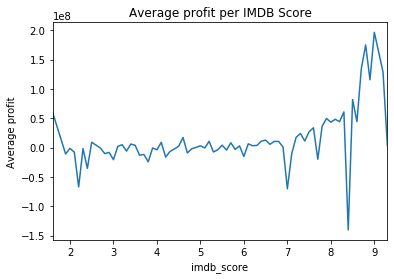

In [24]:
tf2_avg['profit'].plot(kind='line')
# df.groupby('state')['name'].nunique().plot(kind='bar')
# plt.hist(x, bins=20,rwidth=.9)
plt.ylabel('Average profit')
plt.title('Average profit per IMDB Score')
# plt.xticks(rotation='vertical')
plt.show()

From above images we can see that most of the movies are **color** attribute as "color" ,and **country** attribute is "USA",most of the movies in data have **langauge** atribute as "english" so they are not much useful for classification.

Other Attributes as **movie_title** ,**aspect_ratio**,**number of faces**, **movie_imdb_link** (as we have seen in *tableau*) are not affecting IMDB score. we will also remove these attributes.**title_year** is also not afffecting the IMDB score but budget is increasing according to its values so we are not removing it.


In [25]:
unique_count_of_director_name=tf2['director_name'].nunique()
unique_count_of_actor_1_name=tf2['actor_1_name'].nunique()
unique_count_of_actor_2_name=tf2['actor_2_name'].nunique()
unique_count_of_actor_3_name=tf2['actor_3_name'].nunique()
unique_count_of_plot_keywords=tf2['plot_keywords'].nunique()
print(unique_count_of_director_name,unique_count_of_actor_1_name,unique_count_of_actor_2_name,unique_count_of_actor_3_name,unique_count_of_plot_keywords)

1672 1445 2210 2602 3669


**As we can see unique count of above four variable is high so we will also remove these variable too**

In [0]:
# # df['movie_title'][6].replace("\xa0", "", regex=True)
# s = pd.Series(df['movie_title'])
# s = pd.Series(df['movie_title']) 
# k=s.replace("\xa0", "", regex=True)
# df['movie_title']=k
# #we can see some character at last of it

**checking affect of Splited genres on IMDB score**

In [0]:
# # Split Genres
genres_tf2 = tf2[["genres", "imdb_score"]].copy()
kp=genres_tf2['genres'].str.split("|", n=-1, expand=False)
kp1=list(map(set,kp))
new_colm=list(set.union(*kp1))

Add genre colums having value 1 if it is else 0

In [0]:
for add_col in new_colm:
  if add_col not in genres_tf2.columns:
    genres_tf2[add_col]=genres_tf2.apply(lambda row:  1 if (add_col in row.genres) else 0  , axis = 1)

<BarContainer object of 23 artists>

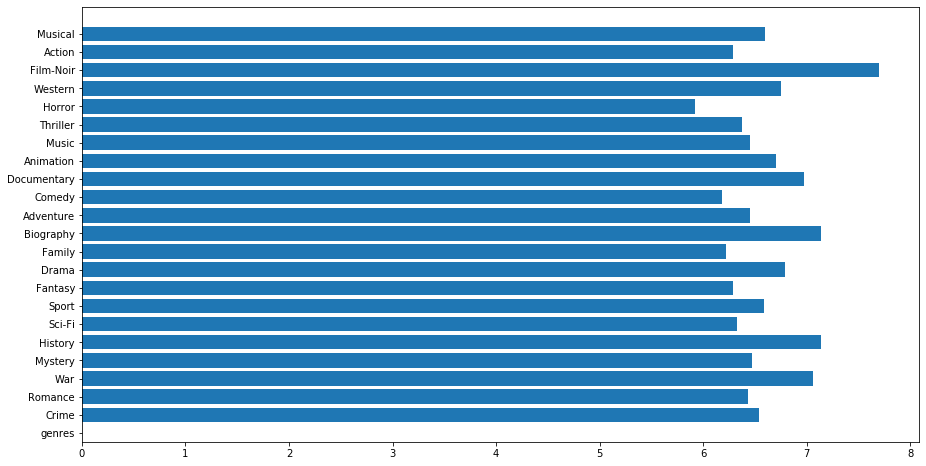

In [29]:
dict_imdb_genres={}
for k in genres_tf2:
  if(k!='imdb_score'):
    dict_imdb_genres[k]=genres_tf2.loc[genres_tf2[k] == 1, 'imdb_score'].mean()
x_plot=list(dict_imdb_genres.keys())
y_plot=list(dict_imdb_genres.values())
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(x_plot, y_plot)

**Here We can see that imdb_score is almost same for all genres so we will drop this column too during applying algorithems and do not and splited genres in main data**

In [0]:
to_remove_column=['country','profit','profit_percentage','movie_imdb_link','facenumber_in_poster','aspect_ratio','movie_title','language','color','director_name','actor_1_name','actor_2_name','actor_2_name','actor_3_name','plot_keywords']
for i in to_remove_column:
    if i in tf2.columns:
        tf2=tf2.drop(columns=[i])
#  tf2=tf2.drop(columns=[i])        
classification_data=tf2
# classification_data=encode_the_data(kf_test)
# classification_data

In [0]:
# classification_data['imdb_score']=classification_data.apply(lambda row:'D' if ( float(row.imdb_score)>=0 and float(row.imdb_score)<5) else ('C' if (float(row.imdb_score)>=5 and float(row.imdb_score)<6) else ('B' if (float(row.imdb_score)>=6 and float(row.imdb_score)<6.5) else ('B+' if (row.imdb_score>=6.5 and float(row.imdb_score)<7) else ('A' if (float(row.imdb_score)>=7 and float(row.imdb_score)<7.5) else ('A+' if (float(row.imdb_score)>=7.5 and float(row.imdb_score)<8) else ('A++' if (float(row.imdb_score)>=8 and float(row.imdb_score)<=10) else 0))) )))  , axis = 1)

In [0]:
classification_data['imdb_score']=classification_data.apply(lambda row:'E' if ( float(row.imdb_score)>=0 and float(row.imdb_score)<5) else ('D' if (float(row.imdb_score)>=5 and float(row.imdb_score)<6) else ('C' if (float(row.imdb_score)>=6 and float(row.imdb_score)<7) else ('B' if (row.imdb_score>=7 and float(row.imdb_score)<8) else ('A' if (float(row.imdb_score)>=8 and float(row.imdb_score)<10) else 0) )))  , axis = 1)

In [0]:
# classification_data['imdb_score']=classification_data.apply(lambda row:'E' if ( float(row.imdb_score)>=0 and float(row.imdb_score)<2) else ('D' if (float(row.imdb_score)>=2 and float(row.imdb_score)<4) else ('C' if (float(row.imdb_score)>=4 and float(row.imdb_score)<6) else ('B' if (row.imdb_score>=6 and float(row.imdb_score)<8) else ('A' if (float(row.imdb_score)>=8 and float(row.imdb_score)<10) else 0) )))  , axis = 1)

In [0]:
# classification_data.groupby('imdb_score').count()

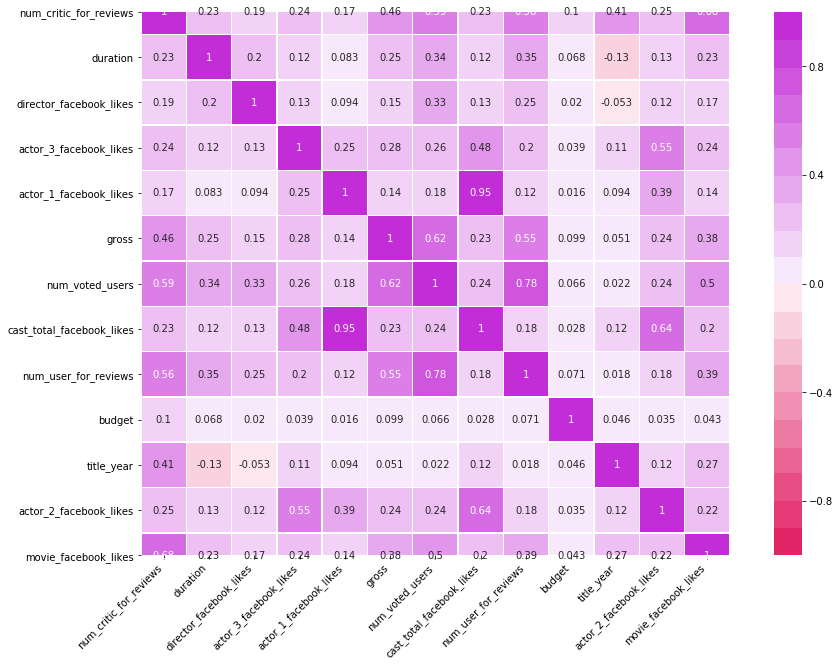

In [35]:
# classification_data
import seaborn as sns
corr = classification_data.corr()
plt.figure(figsize = (16,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 300,s=90, n=20),
    square=True,linewidths=.5,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
# plt.figure(figsize = (16,5))
# Var_Corr = classification_data.corr()
# # plot the heatmap and annotation on it
# sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)

From Attributes Correlation Heatmap we can see that few atributes are highly corelated to each othes as:

1.cast_total_facebook_likes and actor_1_facebook_likes(.95)

2.num_voted_users and num_users_for_reviews (.75)

3.num_voted_users and num_critic_for_reviews (.59)

4.num_users_for_reviews and num_critic_for_reviews(.56)
operation => 

      A.remove cast_total_facebook_likes
      B.add coulumn others_facebook_likes=sum(actor_2_facebook_likes+actor_3_facebook_likes)
      C. add column num_user_per_critic=num_user_for_reviews/num_critic_for_reviews
      D. remove columns num_user_for_reviews and num_critic_for_reviews

In [0]:
backup_classification_data=classification_data


In [0]:
# classification_data=backup_classification_data

In [0]:

classification_data['others_facebook_likes'] = classification_data.apply(lambda row: row.actor_2_facebook_likes + row.actor_3_facebook_likes, axis = 1)
classification_data['num_user_per_critic'] = classification_data.apply(lambda row: (row.num_user_for_reviews/row.num_critic_for_reviews), axis = 1) 

for col in ["cast_total_facebook_likes","num_user_for_reviews","num_critic_for_reviews","actor_2_facebook_likes","actor_3_facebook_likes","genres"]:
  if (col in classification_data.columns):
      classification_data=classification_data.drop(columns=[col])

cols = classification_data.columns.tolist()
cols.remove('imdb_score')
cols.append('imdb_score')
classification_data=classification_data[cols]

# tf2
# classification_data

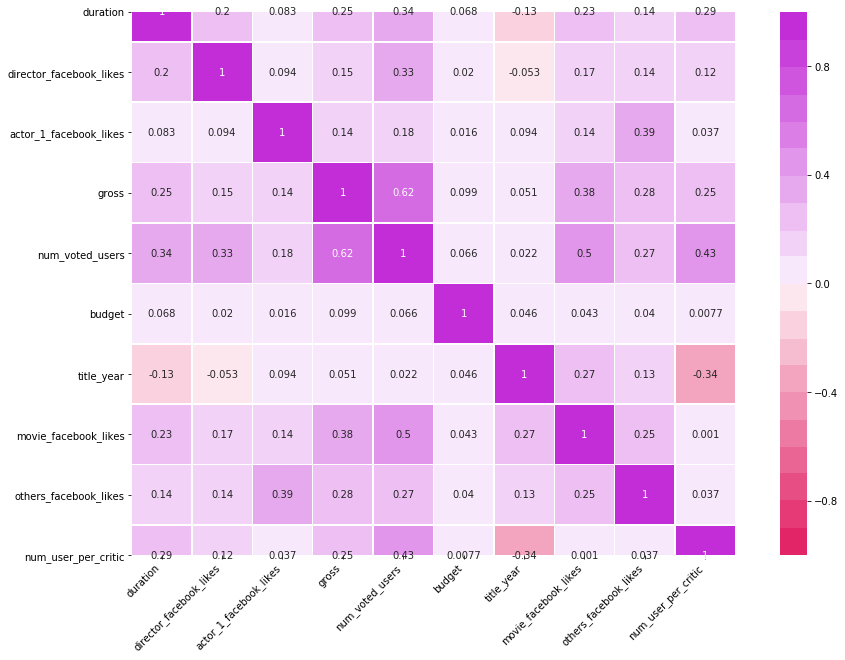

In [39]:
import seaborn as sns
corr = classification_data.corr()
plt.figure(figsize = (16,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 300,s=90, n=20),
    square=True,linewidths=.5,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Algorithem Implementation

In [0]:
# from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import preprocessing
from sklearn import metrics

def encode_the_data(data):
    for col in data.columns:
        if data.dtypes[col] == "object":
            le = preprocessing.LabelEncoder()
#             le.fit(data[col])
#             data[col] = le.transform(data[col].astype(str))
            data[col] = le.fit_transform(data[col].astype(str))
    return data
# # classification_data_en
classification_data_en=encode_the_data(classification_data)
# classification_data_en=classification_data
X=classification_data_en.loc[:, classification_data_en.columns != 'imdb_score']
y=classification_data_en['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
# # **GaussianNB Naive_bayes Classifier**
# from sklearn.naive_bayes import GaussianNB
# model=GaussianNB()
# # X_train, X_test, y_train, y_test
# model.fit(X_train,y_train)
# # multinom_naive_bayes,X_train,Y_train
# naive_Y_predict=model.predict(X_test)
# naive_bayes_accuracy=metrics.accuracy_score(y_test,naive_Y_predict)
# naive_bayes_accuracy

# **Decision Tree Classifier**


**Accuracy with Decision Tree Classifier**

In [0]:
depth_of_tree_x=[]
accuracy_of_tree_y=[]
depth_of_tree=[]
test_accuracy_of_tree_y=[]
# 5,100,10
for depthis in range(3,10):
    decision_tree = tree.DecisionTreeClassifier(criterion = "gini",max_depth=depthis)
    decision_tree.fit(X_train,y_train)
    decision_tree_score_is = cross_val_score(estimator=decision_tree, X=X_train, y=y_train, cv=5)
    depth_of_tree_x.append(depthis)
    accuracy_of_tree_y.append(decision_tree_score_is.mean())
#     print(decision_tree_score_is)
#     print(decision_tree_score_is.mean())
    depth_of_tree.append((depthis,decision_tree_score_is.mean()))
#     decision_tree_score_is = cross_val_score(estimator=decision_tree, X=X_train, y=Y_train, cv=10, n_jobs=4)    
    
    Y_test_pred = decision_tree.predict(X_test)
    test_decision_accuracy_is=metrics.accuracy_score(y_test,Y_test_pred)
    test_accuracy_of_tree_y.append(test_decision_accuracy_is)

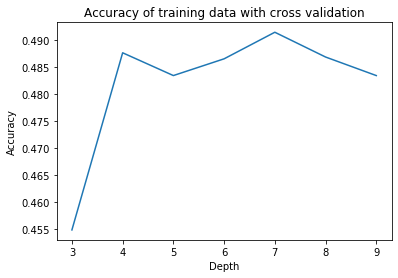

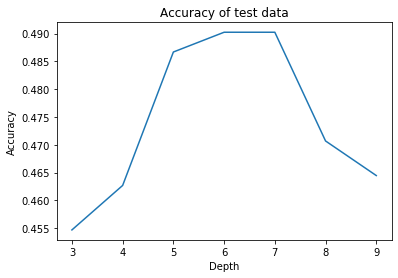

In [43]:
import matplotlib.pyplot as plt
plt.plot(depth_of_tree_x, accuracy_of_tree_y)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title('Accuracy of training data with cross validation')
plt.show()
plt.plot(depth_of_tree_x, test_accuracy_of_tree_y)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title('Accuracy of test data')
plt.show()

In [44]:


decision_tree = tree.DecisionTreeClassifier(criterion = "gini",max_depth=6)
decision_tree.fit(X_train,y_train)
y_test_pred = decision_tree.predict(X_test)
test_decision_accuracy_is=metrics.accuracy_score(y_test,y_test_pred)
# decision_tree_score_is = cross_val_score(estimator=decision_tree, X=X_train, y=Y_train, cv=5)
# depth_of_tree_x.append(depthis)
# accuracy_of_tree_y.append(decision_tree_score_is.mean())
# classification_data_en.columns
test_decision_accuracy_is

0.4920071047957371

**Cross Validation k-fold**

In [45]:
# by using cross validation
decision_tree = tree.DecisionTreeClassifier(criterion = "gini",max_depth=7)
a=X
b=y
decision_tree_score_is = cross_val_score(estimator=decision_tree, X=a, y=b, cv=5)
decision_tree_score_is

array([0.43617021, 0.4114514 , 0.49333333, 0.41866667, 0.37165775])

**Decision Tree Creation**

In [0]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus
# feature_cols=list(X.columns)
# dot_data = StringIO()
# export_graphviz(decision_tree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['A++','A+','A','B++','B','C','D'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('IMDB.png')
# Image(graph.create_png())

# **K-NN Classifier**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
range_k=range(1,100)
score_list=[]
for i in range_k:
   knn=KNeighborsClassifier(n_neighbors=i)
   knn.fit(X_train,y_train)
   ypred=knn.predict(X_test)
   score_list.append(metrics.accuracy_score(y_test,ypred))


Text(0, 0.5, 'Testing Accuracy')

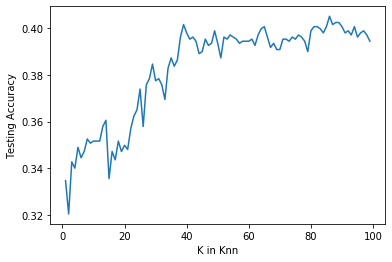

In [48]:
plt.plot(range_k,score_list)
plt.xlabel('K in Knn')
plt.ylabel("Testing Accuracy")

In [49]:
knn=KNeighborsClassifier(n_neighbors=82)
knn.fit(X_train,y_train)
ypred=knn.predict(X_test)
metrics.accuracy_score(y_test,ypred)

0.4005328596802842

Here we can see we are getting best accuracy when k=82

# **Classification using Support Vector Machines**

In [50]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(gamma='scale') 
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3756660746003552


# **Random Forest with and without LDA(linear discriminant analysis )**

**Without LDA**

In [51]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.42095914742451157


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**With LDA**

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_trainlda = lda.fit_transform(X_train, y_train)
X_testlda = lda.transform(X_test)
#LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. LDA tries to find a decision boundary around each cluster of a class.

In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_trainlda, y_train)
y_pred = classifier.predict(X_testlda)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4573712255772647


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
# classification_data['imdb_score'].uniquecount()
# classification_data.groupby('imdb_score').count()

In [55]:
float("7.8")

7.8